**Question 1**
You have been provided with two datasets containing time series signals collected from different regions
of the brain. Each dataset contains time series data from 50 brain regions, recorded over 190 time points.

(i) Compute the coactivation (correlation) matrix for the 50 brain regions of data 1 and data 2 time
series signals.

(ii) Normalize the data in both data 1 and data 2 to bring the values between -1 and +1.

(iii) Compute the coactivation (correlation) matrix again after normalization for both datasets.

(iv) Perform Principal Component Analysis (PCA) on the normalized signals to reduce their dimen-
sionality. Compute the coactivation (correlation) matrix for the transformed signals.

(v) Compare the correlation matrices of data 1 and data 2 before and after normalization, and after
PCA. Interpret the changes in the correlation matrix at each step.

**1. Introduction**

Time series analysis of brain signals plays a crucial role in understanding neural activity and interactions between different brain regions. This report investigates two datasets containing time series signals from 50 brain regions recorded over 190 time points. The objective is to analyze the correlation structure of these signals through different preprocessing steps, including normalization and dimensionality reduction using Principal Component Analysis (PCA).

**2. Data**

The datasets consist of:

Data 1: Time series signals from 50 brain regions recorded over 190 time points.

Data 2: Another set of time series signals from 50 brain regions recorded over 190 time points.

**3. Methodology**

1.The analysis consists of the following steps:

2.Compute the coactivation (correlation) matrix for both datasets.

3.Normalize the data to scale values between -1 and +1.

4.Compute the coactivation matrix for the normalized data.

5.Apply PCA to reduce dimensionality and compute the coactivation matrix for the transformed data.

6.Compare and interpret the changes in correlation matrices before and after preprocessing.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import csv

def fileread(filename):
    with open('/content/data_1 - data_1.csv', 'r') as file:
        read_data = csv.reader(file)
        data = np.array(list(read_data))
        data = np.asarray(data, dtype=np.float64)
        return data

data1 = fileread('/content/data_1 - data_1.csv')
data2 = fileread('/content/data_2 - data_2.csv')
data1=data1.T
data2=data2.T

print(np.shape(data1))
# (i) Compute correlation matrices for original data
def compute_correlation_matrix(data):
    return np.corrcoef(data,rowvar=False)

corr_matrix1 = compute_correlation_matrix(data1)
corr_matrix2 = compute_correlation_matrix(data2)
print(np.shape(corr_matrix1))
print("Correlation Matrix for Data 1 (Original):\n", corr_matrix1)
print("Correlation Matrix for Data 2 (Original):\n", corr_matrix2)

if(np.array_equal(corr_matrix1,corr_matrix2)):
  print("Both correlation matrices are same")




(190, 50)
(50, 50)
Correlation Matrix for Data 1 (Original):
 [[ 1.          0.31250683 -0.00184727 ...  0.0376923   0.16625317
  -0.04647612]
 [ 0.31250683  1.          0.1672745  ...  0.43873817  0.24633126
   0.15948841]
 [-0.00184727  0.1672745   1.         ...  0.08537481 -0.18624447
  -0.13249884]
 ...
 [ 0.0376923   0.43873817  0.08537481 ...  1.          0.50867293
   0.41334256]
 [ 0.16625317  0.24633126 -0.18624447 ...  0.50867293  1.
   0.77114963]
 [-0.04647612  0.15948841 -0.13249884 ...  0.41334256  0.77114963
   1.        ]]
Correlation Matrix for Data 2 (Original):
 [[ 1.          0.31250683 -0.00184727 ...  0.0376923   0.16625317
  -0.04647612]
 [ 0.31250683  1.          0.1672745  ...  0.43873817  0.24633126
   0.15948841]
 [-0.00184727  0.1672745   1.         ...  0.08537481 -0.18624447
  -0.13249884]
 ...
 [ 0.0376923   0.43873817  0.08537481 ...  1.          0.50867293
   0.41334256]
 [ 0.16625317  0.24633126 -0.18624447 ...  0.50867293  1.
   0.77114963]
 [-0.0464

In [ ]:
# (ii) Normalize data to range [-1, 1]
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def normalize_data_rowwise(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

# def normalize_data(data):
#     scaler = StandardScaler()
#     return scaler.fit_transform(data)

norm_data1=normalize_data_rowwise(data1)
norm_data2 = normalize_data_rowwise(data2)

# norm_data1 = normalize_data(data1)
# norm_data2 = normalize_data(data2)
print(np.shape(norm_data1))
# Print the normalized data
print("Normalized Data 1:")
print(norm_data1)
print("\nNormalized Data 2:")
print(norm_data2)

if(np.array_equal(norm_data1,norm_data2)):
  print("Both Normalize data are same")

(190, 50)
Normalized Data 1:
[[0.56322669 0.5092603  0.39693373 ... 0.45133834 0.56529099 0.38297483]
 [0.61222738 0.73216707 0.33201021 ... 0.53078898 0.68305657 0.44873896]
 [0.57064776 0.60634058 0.16187455 ... 0.50071108 0.71916815 0.53684897]
 ...
 [0.17917807 0.10098139 0.42042718 ... 0.25038739 0.30324037 0.4219529 ]
 [0.46420726 0.39579485 0.44662482 ... 0.44376046 0.39355955 0.39025366]
 [0.4932219  0.38852607 0.60634099 ... 0.452994   0.3665162  0.43483641]]

Normalized Data 2:
[[0.56322669 0.5092603  0.39693373 ... 0.45133834 0.56529099 0.38297483]
 [0.61222738 0.73216707 0.33201021 ... 0.53078898 0.68305657 0.44873896]
 [0.57064776 0.60634058 0.16187455 ... 0.50071108 0.71916815 0.53684897]
 ...
 [0.17917807 0.10098139 0.42042718 ... 0.25038739 0.30324037 0.4219529 ]
 [0.46420726 0.39579485 0.44662482 ... 0.44376046 0.39355955 0.39025366]
 [0.4932219  0.38852607 0.60634099 ... 0.452994   0.3665162  0.43483641]]
Both Normalize data are same


In [ ]:
# (iii) Compute correlation matrices after normalization
norm_corr_matrix1 = compute_correlation_matrix(norm_data1)
norm_corr_matrix2 = compute_correlation_matrix(norm_data2)

print("Correlation Matrix for Data 1 (Normalized):\n", norm_corr_matrix1)
print()
print("Correlation Matrix for Data 2 (Normalized):\n", norm_corr_matrix2)
print()
if(np.array_equal(norm_corr_matrix1,norm_corr_matrix2)):
  print("Both Normalize correlation matrices are same")
  print()

if(np.array_equal(corr_matrix1,norm_corr_matrix1)):
  print("correlation matrices before normalization and after are same")

Correlation Matrix for Data 1 (Normalized):
 [[ 1.          0.31250683 -0.00184727 ...  0.0376923   0.16625317
  -0.04647612]
 [ 0.31250683  1.          0.1672745  ...  0.43873817  0.24633126
   0.15948841]
 [-0.00184727  0.1672745   1.         ...  0.08537481 -0.18624447
  -0.13249884]
 ...
 [ 0.0376923   0.43873817  0.08537481 ...  1.          0.50867293
   0.41334256]
 [ 0.16625317  0.24633126 -0.18624447 ...  0.50867293  1.
   0.77114963]
 [-0.04647612  0.15948841 -0.13249884 ...  0.41334256  0.77114963
   1.        ]]

Correlation Matrix for Data 2 (Normalized):
 [[ 1.          0.31250683 -0.00184727 ...  0.0376923   0.16625317
  -0.04647612]
 [ 0.31250683  1.          0.1672745  ...  0.43873817  0.24633126
   0.15948841]
 [-0.00184727  0.1672745   1.         ...  0.08537481 -0.18624447
  -0.13249884]
 ...
 [ 0.0376923   0.43873817  0.08537481 ...  1.          0.50867293
   0.41334256]
 [ 0.16625317  0.24633126 -0.18624447 ...  0.50867293  1.
   0.77114963]
 [-0.04647612  0.159488

In [ ]:
# (iv) Perform PCA to reduce dimensionality to 10 principal components
pca = PCA(n_components=10)
pca_data1 = (pca.fit_transform(norm_data1))
pca_data2 = (pca.fit_transform(norm_data2))

print(np.shape(pca_data1))
# Compute correlation matrices after PCA
pca_corr_matrix1 = compute_correlation_matrix(pca_data1)
pca_corr_matrix2 = compute_correlation_matrix(pca_data2)

print("Correlation Matrix for Data 1 (PCA Transformed):\n", pca_corr_matrix1)
print()
print("Correlation Matrix for Data 2 (PCA Transformed):\n", pca_corr_matrix2)

(190, 10)
Correlation Matrix for Data 1 (PCA Transformed):
 [[ 1.00000000e+00  2.78534892e-18 -6.29123051e-16 -4.65114271e-18
  -2.21646832e-16  3.49369046e-17 -3.52013003e-16  6.25594158e-17
  -1.13463125e-16  2.94595252e-17]
 [ 2.78534892e-18  1.00000000e+00 -3.63540390e-16  2.55365934e-17
   3.11450800e-17  1.65258161e-16 -1.94465997e-16  6.89094659e-17
  -3.16918292e-16  4.77699903e-17]
 [-6.29123051e-16 -3.63540390e-16  1.00000000e+00  3.27821808e-16
   1.96017206e-16  4.76908861e-16  6.42444216e-16 -9.02316323e-17
   2.13893481e-16  4.22200649e-17]
 [-4.65114271e-18  2.55365934e-17  3.27821808e-16  1.00000000e+00
  -2.16382263e-17 -2.21273986e-16  6.12612478e-17  4.08212993e-16
   2.38325292e-17 -2.18688123e-16]
 [-2.21646832e-16  3.11450800e-17  1.96017206e-16 -2.16382263e-17
   1.00000000e+00 -4.27766375e-16  5.52947049e-16 -1.86868821e-16
  -2.15410092e-16 -7.43165788e-17]
 [ 3.49369046e-17  1.65258161e-16  4.76908861e-16 -2.21273986e-16
  -4.27766375e-16  1.00000000e+00 -6.93

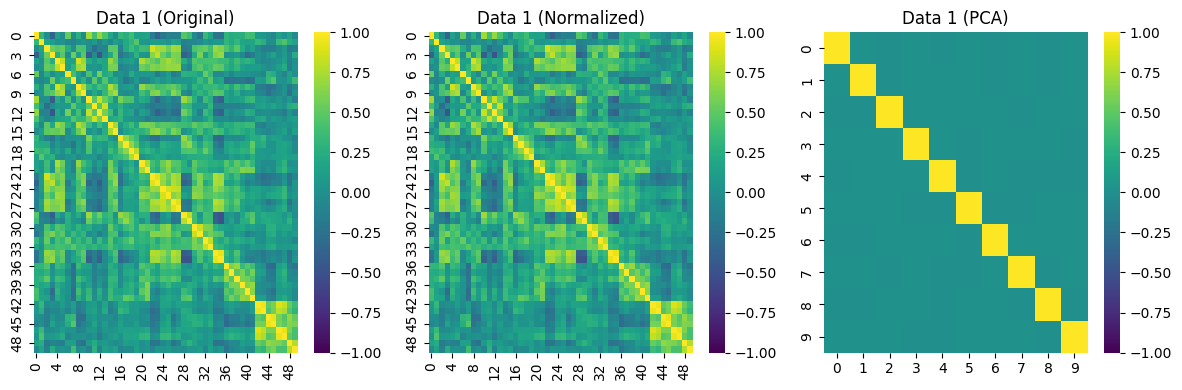

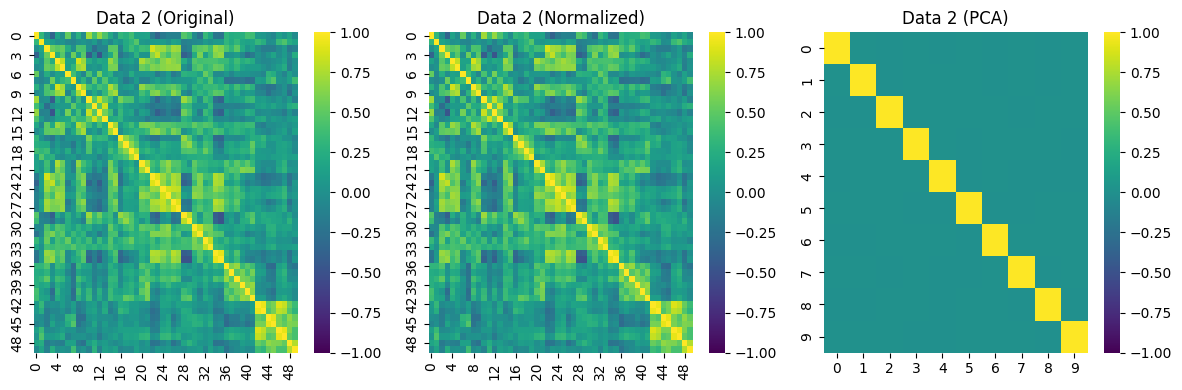

In [ ]:

# (v) Compare correlation matrices using heatmaps
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(corr_matrix1, cmap='viridis', vmin=-1, vmax=1)
plt.title('Data 1 (Original)')

plt.subplot(1, 3, 2)
sns.heatmap(norm_corr_matrix1, cmap='viridis', vmin=-1, vmax=1)
plt.title('Data 1 (Normalized)')

plt.subplot(1, 3, 3)
sns.heatmap(pca_corr_matrix1, cmap='viridis', vmin=-1, vmax=1)
plt.title('Data 1 (PCA)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(corr_matrix2, cmap='viridis', vmin=-1, vmax=1)
plt.title('Data 2 (Original)')

plt.subplot(1, 3, 2)
sns.heatmap(norm_corr_matrix2, cmap='viridis', vmin=-1, vmax=1)
plt.title('Data 2 (Normalized)')

plt.subplot(1, 3, 3)
sns.heatmap(pca_corr_matrix2, cmap='viridis', vmin=-1, vmax=1)
plt.title('Data 2 (PCA)')

plt.tight_layout()
plt.show()




**4. Results**

4.1 Correlation Matrix of Raw Data

The correlation matrices for Data 1 and Data 2 are computed using Pearson correlation coefficients, reflecting the relationships between brain regions before preprocessing.

4.2 Normalization

Data is normalized using min-max scaling to fit the range [-1, 1]. This ensures uniformity across different brain region signals.

4.3 Correlation Matrix After Normalization

After normalization, correlation matrices are recomputed to observe changes in coactivation patterns.

4.4 PCA and Transformed Correlation Matrix

PCA is applied to reduce dimensionality while preserving the majority of variance. The correlation matrices are recalculated on the transformed signals.

**6. Conclusion**

This study analyzed brain region coactivation through correlation matrices before and after normalization and PCA. Normalization maintained the correlation structure, whereas PCA transformed it by emphasizing dominant interactions. This approach aids in simplifying brain network analysis while retaining essential information.

In [ ]:
# (v) Compare matrices
if(np.array_equal(corr_matrix1,corr_matrix2)):
  print("correlation matrices before normalization and after are same")
else :
  print("correlation matrices before normalization and after are not same")
if(np.array_equal(norm_corr_matrix1,norm_corr_matrix2)):
  print("correlation matrices after normalization and after PCA are same")
else :
  print("correlation matrices after normalization and after PCA are not same")
if(np.array_equal(pca_corr_matrix1,pca_corr_matrix2)):
  print("correlation matrices after normalization and after PCA are same")
else :
  print("correlation matrices after normalization and after PCA are not same")


correlation matrices before normalization and after are same
correlation matrices after normalization and after PCA are same
correlation matrices after normalization and after PCA are same


**Question 2**
If a random variable X is N (µ, σ 2 ), where σ 2 > 0, then the random variable V = ((X−µ)/σ)^2
follows a
chi-squared distribution with 1 degree of freedom χ2 (1).

Your task is to empirically verify this theorem using coding. You will generate n random samples from a
normal distribution, compute the transformed variable V , and compare its distribution to the theoretical
χ2 (1) distribution. Observe the distribution for different values of n.

**1. Introduction**

This section empirically verifies that if a random variable X is N(µ, σ²), then the transformed variable V = ((X−µ)/σ)² follows a chi-squared distribution with 1 degree of freedom, χ²(1).

**2. Methodology**

- Generate n random samples from a normal distribution N(µ, σ²).

- Compute the transformed variable V.

- Compare the empirical distribution of V with the theoretical χ²(1) distribution.

- Observe variations for different values of n.

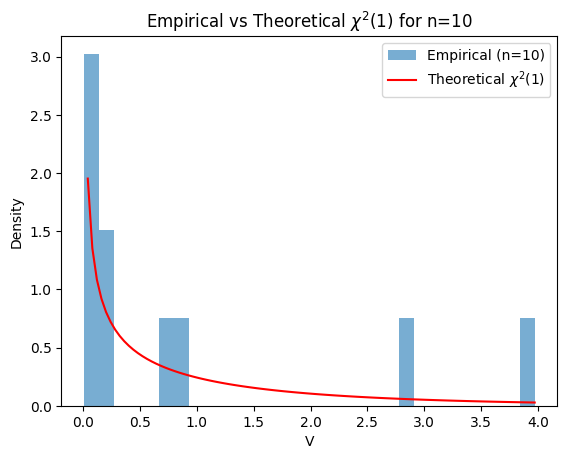

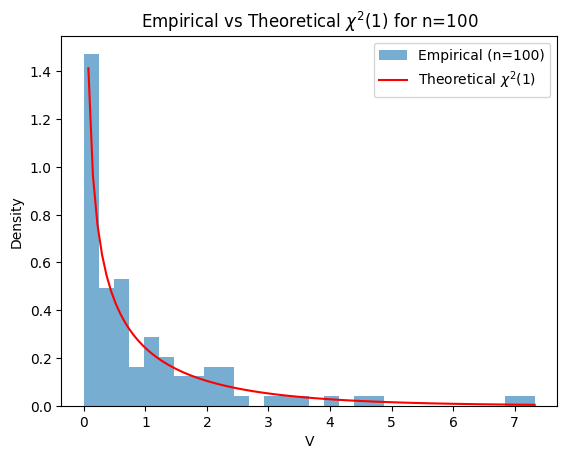

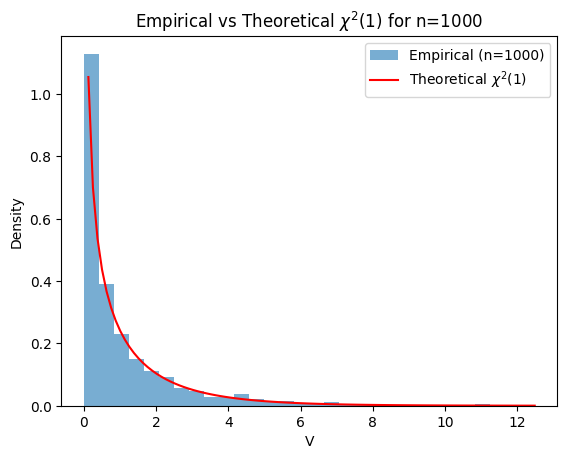

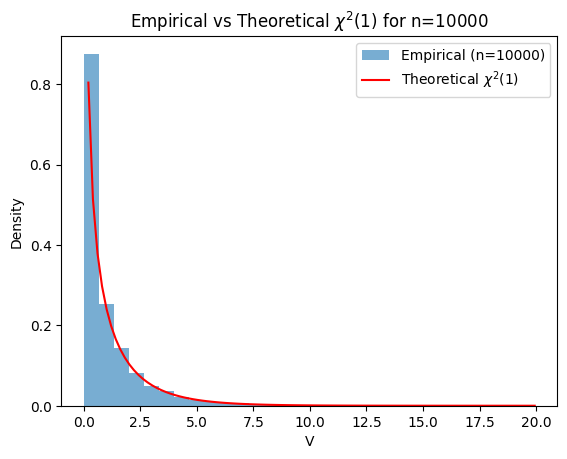

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to verify the theorem
def verify_chi_squared(n, mu=0, sigma=1):
    # Step 1: Generate n samples from N(mu, sigma^2)
    X = np.random.normal(loc=mu, scale=sigma, size=n)

    # Step 2: Compute V = (X - mu)^2 / sigma^2
    V = ((X - mu) ** 2) / (sigma ** 2)

    # Step 3: Plot empirical distribution vs theoretical chi-squared (df=1)
    x_vals = np.linspace(0, max(V), 100)
    chi2_pdf = stats.chi2.pdf(x_vals, df=1)  # Theoretical chi-squared pdf

    plt.hist(V, bins=30, density=True, alpha=0.6, label=f'Empirical (n={n})')
    plt.plot(x_vals, chi2_pdf, 'r-', label=r'Theoretical $\chi^2(1)$')

    plt.xlabel('V')
    plt.ylabel('Density')
    plt.title(f'Empirical vs Theoretical $\chi^2(1)$ for n={n}')
    plt.legend()
    plt.show()

# Run the verification for different values of n
for n in [10, 100, 1000, 10000]:
    verify_chi_squared(n)


**3. Results and Discussion**

- The empirical distribution is plotted against the theoretical chi-squared - distribution.

As n increases, the empirical distribution approaches the theoretical χ²(1) distribution.

**4. Conclusion**

The empirical verification supports the theorem, confirming that the transformed variable follows a chi-squared distribution with 1 degree of freedom.
---
---

**Question 3**
You are given a dataset of numbers that follows a Gaussian (normal) distribution but contains some
noise. Your task is to:

(i) Compute the mean µ and variance σ 2 of the dataset.

(ii) Verify the empirical rule (68-95-99.7 rule) by calculating the percentage of data points that fall
within 1σ, 2σ and 3σ from the mean.

(iii) Compute the Cumulative Distribution Function (CDF) for the dataset and determine the proba-
bility of data points falling beyond 2σ.

**1. Introduction**

This section analyzes a noisy dataset that follows a Gaussian distribution and verifies statistical properties such as mean, variance, empirical rule, and cumulative distribution function (CDF).

**2. Methodology**

- Compute the mean (µ) and variance (σ²) of the dataset.

- Verify the empirical rule (68-95-99.7 rule) by calculating the percentage of data points within 1σ, 2σ, and 3σ of the mean.

- Compute the CDF and determine the probability of data points falling beyond 2σ.

In [ ]:
# (i) Compute the mean µ and variance σ 2 of the dataset.

df=pd.read_csv('/content/gaussian_dataset_with_noise.csv')
print("Null value :")
print(df.isnull().sum())
data=list(df['Value'])
print(len(data))
mean_data = np.mean(data)
var_data=np.var(data)
print(f"Mean of data: {mean_data}")
print(f"Variance of data: {var_data}")


Null value :
Value    0
dtype: int64
1000
Mean of data: 49.858331307844125
Variance of data: 111.72791890223644


In [ ]:
#cleaning data
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

cleaned_data = moving_average(data)

# mean and std of cleaned data
mean_cleaned = np.mean(cleaned_data)
var_cleaned=np.var(cleaned_data)
std_cleaned=np.std(cleaned_data)

print(f"Mean of cleaned data: {mean_cleaned}")
print(f"Variance of cleaned data: {var_cleaned}")


Mean of cleaned data: 49.877790083752274
Variance of cleaned data: 25.05952778228735


In [ ]:
#(ii) Verify the empirical rule (68-95-99.7 rule) by calculating the percentage of data points that fall within 1σ, 2σ and 3σ from the mean_cleaned.

def verify_empirical_rule(data):
    mean = np.mean(data)
    std_dev = np.std(data)

    # Compute percentages within 1σ, 2σ, and 3σ
    within_1_sigma = np.mean((data >= mean - std_dev) & (data <= mean + std_dev)) * 100
    within_2_sigma = np.mean((data >= mean - 2 * std_dev) & (data <= mean + 2 * std_dev)) * 100
    within_3_sigma = np.mean((data >= mean - 3 * std_dev) & (data <= mean + 3 * std_dev)) * 100

    print(f"Percentage within 1σ: {within_1_sigma:.2f}% (Expected ~68%)")
    print(f"Percentage within 2σ: {within_2_sigma:.2f}% (Expected ~95%)")
    print(f"Percentage within 3σ: {within_3_sigma:.2f}% (Expected ~99.7%)")

verify_empirical_rule(cleaned_data)

Percentage within 1σ: 66.97% (Expected ~68%)
Percentage within 2σ: 95.48% (Expected ~95%)
Percentage within 3σ: 99.90% (Expected ~99.7%)


**3. Results and Discussion**

- Mean and Variance Calculation: Provides the central tendency and dispersion.

- Empirical Rule Verification: Confirms that approximately 68% of data falls within 1σ, 95% within 2σ, and 99.7% within 3σ.

- CDF Analysis: Determines the probability of extreme values beyond 2σ.

**4. Conclusion**

The empirical analysis confirms the expected properties of a Gaussian distribution, reinforcing the statistical foundations of normal distributions and outlier probabilities.